In [2]:
# Import pandas library
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



csv_file_path = '/content/sample_data/electricity_consumption (1).csv'

df = pd.read_csv(csv_file_path)

print(df)

             Year Country Code                      Country  \
0      1960-01-01          ABW                        Aruba   
1      1960-01-01          AFE  Africa Eastern and Southern   
2      1960-01-01          AFG                  Afghanistan   
3      1960-01-01          AFW   Africa Western and Central   
4      1960-01-01          AGO                       Angola   
...           ...          ...                          ...   
16955  2023-01-01          XKX                       Kosovo   
16956  2023-01-01          YEM                  Yemen, Rep.   
16957  2023-01-01          ZAF                 South Africa   
16958  2023-01-01          ZMB                       Zambia   
16959  2023-01-01          ZWE                     Zimbabwe   

               IncomeGroup   Population  GDP per capita (current US$)  \
0              High income      54608.0                           NaN   
1                      NaN  130692579.0                    141.385955   
2               Low inco

In [3]:
df['Year'] = pd.to_datetime(df['Year'], errors='coerce')

In [4]:
df['Year'] = df['Year'].dt.year

In [5]:
gdp_data_long_cleaned_file_path = '/content/sample_data/gdp_data_long_cleaned_IMF.csv'
gdp_data_long_cleaned = pd.read_csv(gdp_data_long_cleaned_file_path)

gdp_data_long_cleaned

,Country,Year,GDP
0,Albania,1980,728.359
1,Algeria,1980,2462.085
2,Angola,1980,802.627
3,Antigua and Barbuda,1980,1920.249
4,Argentina,1980,8361.209
...,...,...,...
10428,Major advanced economies (G7),2029,74590.436
10429,Middle East and Central Asia,2029,6908.869
10430,Other advanced economies,2029,62416.984
10431,Sub-Saharan Africa,2029,1971.149


In [6]:
missing_values = df.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                3136
Population                                  295
GDP per capita (current US$)               3758
Access to electricity (% of population)    9612
Inflation (annual %)                       6172
Consumption (kWh per capita)               9170
dtype: int64

In [7]:
data_test = df.dropna(subset=['Consumption (kWh per capita)','IncomeGroup', 'Year'])
data_test.shape

(5859, 9)

In [8]:
missing_values = data_test.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)                584
Access to electricity (% of population)    2840
Inflation (annual %)                        921
Consumption (kWh per capita)                  0
dtype: int64

In [9]:
gdp_data_long_cleaned

,Country,Year,GDP
0,Albania,1980,728.359
1,Algeria,1980,2462.085
2,Angola,1980,802.627
3,Antigua and Barbuda,1980,1920.249
4,Argentina,1980,8361.209
...,...,...,...
10428,Major advanced economies (G7),2029,74590.436
10429,Middle East and Central Asia,2029,6908.869
10430,Other advanced economies,2029,62416.984
10431,Sub-Saharan Africa,2029,1971.149


In [10]:
gdp_data_long_cleaned = gdp_data_long_cleaned.rename(columns={'GDP': 'GDP per capita (current US$)'})
gdp_data_long_cleaned

,Country,Year,GDP per capita (current US$)
0,Albania,1980,728.359
1,Algeria,1980,2462.085
2,Angola,1980,802.627
3,Antigua and Barbuda,1980,1920.249
4,Argentina,1980,8361.209
...,...,...,...
10428,Major advanced economies (G7),2029,74590.436
10429,Middle East and Central Asia,2029,6908.869
10430,Other advanced economies,2029,62416.984
10431,Sub-Saharan Africa,2029,1971.149


In [11]:
inflation_data_cleaned_file_path = '/content/sample_data/inflation_data_cleaned_IMF.csv'
inflation_data_cleaned = pd.read_csv(inflation_data_cleaned_file_path)

inflation_data_cleaned

,Country,Year,Inflation rate
0,Algeria,1980,9.7
1,Angola,1980,46.7
2,Antigua and Barbuda,1980,19.0
3,Australia,1980,10.1
4,Austria,1980,6.3
...,...,...,...
10363,Major advanced economies (G7),2029,2.1
10364,Middle East and Central Asia,2029,6.6
10365,Other advanced economies,2029,2.0
10366,Sub-Saharan Africa,2029,9.0


In [12]:
data_test.columns

Index(['Year', 'Country Code', 'Country', 'IncomeGroup', 'Population',
       'GDP per capita (current US$)',
       'Access to electricity (% of population)', 'Inflation (annual %)',
       'Consumption (kWh per capita)'],
      dtype='object')

In [13]:
gdp_data_long_cleaned.columns

Index(['Country', 'Year', 'GDP per capita (current US$)'], dtype='object')

In [14]:
missing_values = gdp_data_long_cleaned.isna().sum()
missing_values

Country                         0
Year                            0
GDP per capita (current US$)    0
dtype: int64

In [15]:
missing_values = data_test.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)                584
Access to electricity (% of population)    2840
Inflation (annual %)                        921
Consumption (kWh per capita)                  0
dtype: int64

In [16]:
data_test_2 = pd.merge(data_test, gdp_data_long_cleaned[['Country', 'Year', 'GDP per capita (current US$)']], on=['Country', 'Year'], how='left')

In [17]:
data_test_2['GDP per capita (current US$)_x'] = data_test_2['GDP per capita (current US$)_x'].combine_first(data_test_2['GDP per capita (current US$)_y'])


In [18]:
data_test_2

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$)_x,Access to electricity (% of population),Inflation (annual %),Consumption (kWh per capita),GDP per capita (current US$)_y
0,1960,AUS,Australia,High income,10276477.0,1810.597443,NaN,3.728814,1825.625650,NaN
1,1960,AUT,Austria,High income,7047539.0,935.460427,NaN,1.945749,1814.676017,NaN
2,1960,BEL,Belgium,High income,9153489.0,1273.691659,NaN,0.299467,1576.338815,NaN
3,1960,CAN,Canada,High income,17909356.0,2259.250511,NaN,1.358696,5630.520718,NaN
4,1960,CHE,Switzerland,High income,5327827.0,1787.360348,NaN,1.438795,3075.550313,NaN
...,...,...,...,...,...,...,...,...,...,...
5854,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,97.537367,6.363121,910.000000,3368.134
5855,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,97.620000,3.525805,956.000000,3604.990
5856,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,98.140000,3.808798,1021.000000,3885.967
5857,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,98.510000,3.198346,1064.000000,3945.583


In [19]:
missing_values = data_test_2.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)_x              460
Access to electricity (% of population)    2840
Inflation (annual %)                        921
Consumption (kWh per capita)                  0
GDP per capita (current US$)_y             2067
dtype: int64

In [20]:
data_test_2 = data_test_2.drop(columns=['GDP per capita (current US$)_y'])

In [21]:
data_test_2

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$)_x,Access to electricity (% of population),Inflation (annual %),Consumption (kWh per capita)
0,1960,AUS,Australia,High income,10276477.0,1810.597443,NaN,3.728814,1825.625650
1,1960,AUT,Austria,High income,7047539.0,935.460427,NaN,1.945749,1814.676017
2,1960,BEL,Belgium,High income,9153489.0,1273.691659,NaN,0.299467,1576.338815
3,1960,CAN,Canada,High income,17909356.0,2259.250511,NaN,1.358696,5630.520718
4,1960,CHE,Switzerland,High income,5327827.0,1787.360348,NaN,1.438795,3075.550313
...,...,...,...,...,...,...,...,...,...
5854,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,97.537367,6.363121,910.000000
5855,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,97.620000,3.525805,956.000000
5856,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,98.140000,3.808798,1021.000000
5857,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,98.510000,3.198346,1064.000000


In [22]:
missing_values = data_test_2.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)_x              460
Access to electricity (% of population)    2840
Inflation (annual %)                        921
Consumption (kWh per capita)                  0
dtype: int64

In [23]:
data_test_2_output_path_2 = 'data_test_2.csv'
data_test_2.to_csv(data_test_2_output_path_2, index=False)

In [24]:
missing_values = data_test_2.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)_x              460
Access to electricity (% of population)    2840
Inflation (annual %)                        921
Consumption (kWh per capita)                  0
dtype: int64

In [25]:
data_test_2

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$)_x,Access to electricity (% of population),Inflation (annual %),Consumption (kWh per capita)
0,1960,AUS,Australia,High income,10276477.0,1810.597443,NaN,3.728814,1825.625650
1,1960,AUT,Austria,High income,7047539.0,935.460427,NaN,1.945749,1814.676017
2,1960,BEL,Belgium,High income,9153489.0,1273.691659,NaN,0.299467,1576.338815
3,1960,CAN,Canada,High income,17909356.0,2259.250511,NaN,1.358696,5630.520718
4,1960,CHE,Switzerland,High income,5327827.0,1787.360348,NaN,1.438795,3075.550313
...,...,...,...,...,...,...,...,...,...
5854,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,97.537367,6.363121,910.000000
5855,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,97.620000,3.525805,956.000000
5856,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,98.140000,3.808798,1021.000000
5857,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,98.510000,3.198346,1064.000000


In [26]:
inflation_data_cleaned = inflation_data_cleaned.rename(columns={'Inflation rate': 'Inflation (annual %)'})
inflation_data_cleaned

,Country,Year,Inflation (annual %)
0,Algeria,1980,9.7
1,Angola,1980,46.7
2,Antigua and Barbuda,1980,19.0
3,Australia,1980,10.1
4,Austria,1980,6.3
...,...,...,...
10363,Major advanced economies (G7),2029,2.1
10364,Middle East and Central Asia,2029,6.6
10365,Other advanced economies,2029,2.0
10366,Sub-Saharan Africa,2029,9.0


In [27]:
data_test_3 = pd.merge(data_test_2, inflation_data_cleaned[['Country', 'Year', 'Inflation (annual %)']], on=['Country', 'Year'], how='left')

In [28]:
data_test_3

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$)_x,Access to electricity (% of population),Inflation (annual %)_x,Consumption (kWh per capita),Inflation (annual %)_y
0,1960,AUS,Australia,High income,10276477.0,1810.597443,NaN,3.728814,1825.625650,NaN
1,1960,AUT,Austria,High income,7047539.0,935.460427,NaN,1.945749,1814.676017,NaN
2,1960,BEL,Belgium,High income,9153489.0,1273.691659,NaN,0.299467,1576.338815,NaN
3,1960,CAN,Canada,High income,17909356.0,2259.250511,NaN,1.358696,5630.520718,NaN
4,1960,CHE,Switzerland,High income,5327827.0,1787.360348,NaN,1.438795,3075.550313,NaN
...,...,...,...,...,...,...,...,...,...,...
5854,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,97.537367,6.363121,910.000000,6.4
5855,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,97.620000,3.525805,956.000000,3.5
5856,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,98.140000,3.808798,1021.000000,3.8
5857,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,98.510000,3.198346,1064.000000,3.3


In [29]:
data_test_3['Inflation (annual %)_x'] = data_test_3['Inflation (annual %)_x'].combine_first(data_test_3['Inflation (annual %)_y'])
data_test_3 = data_test_3.drop(columns=['Inflation (annual %)_y'])

In [30]:
missing_values = data_test_2.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)_x              460
Access to electricity (% of population)    2840
Inflation (annual %)                        921
Consumption (kWh per capita)                  0
dtype: int64

In [31]:
missing_values = data_test_3.isna().sum()
missing_values

Year                                          0
Country Code                                  0
Country                                       0
IncomeGroup                                   0
Population                                    0
GDP per capita (current US$)_x              460
Access to electricity (% of population)    2840
Inflation (annual %)_x                      578
Consumption (kWh per capita)                  0
dtype: int64

In [32]:
data_test_3

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$)_x,Access to electricity (% of population),Inflation (annual %)_x,Consumption (kWh per capita)
0,1960,AUS,Australia,High income,10276477.0,1810.597443,NaN,3.728814,1825.625650
1,1960,AUT,Austria,High income,7047539.0,935.460427,NaN,1.945749,1814.676017
2,1960,BEL,Belgium,High income,9153489.0,1273.691659,NaN,0.299467,1576.338815
3,1960,CAN,Canada,High income,17909356.0,2259.250511,NaN,1.358696,5630.520718
4,1960,CHE,Switzerland,High income,5327827.0,1787.360348,NaN,1.438795,3075.550313
...,...,...,...,...,...,...,...,...,...
5854,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,97.537367,6.363121,910.000000
5855,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,97.620000,3.525805,956.000000
5856,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,98.140000,3.808798,1021.000000
5857,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,98.510000,3.198346,1064.000000


In [33]:
data_test_4 = data_test_3.drop(columns=['Access to electricity (% of population)'])

data_test_4 = data_test_3.dropna(subset=['GDP per capita (current US$)_x', 'Inflation (annual %)_x'])


In [34]:
data_test_4 = data_test_4.drop(columns=['Access to electricity (% of population)'])

In [35]:
data_test_4.shape

(5133, 8)

In [36]:

missing_values = data_test_4.isna().sum()
missing_values

Year                              0
Country Code                      0
Country                           0
IncomeGroup                       0
Population                        0
GDP per capita (current US$)_x    0
Inflation (annual %)_x            0
Consumption (kWh per capita)      0
dtype: int64

In [37]:
data_test

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$),Access to electricity (% of population),Inflation (annual %),Consumption (kWh per capita)
13,1960,AUS,Australia,High income,10276477.0,1810.597443,NaN,3.728814,1825.625650
14,1960,AUT,Austria,High income,7047539.0,935.460427,NaN,1.945749,1814.676017
17,1960,BEL,Belgium,High income,9153489.0,1273.691659,NaN,0.299467,1576.338815
35,1960,CAN,Canada,High income,17909356.0,2259.250511,NaN,1.358696,5630.520718
37,1960,CHE,Switzerland,High income,5327827.0,1787.360348,NaN,1.438795,3075.550313
...,...,...,...,...,...,...,...,...,...
14681,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,97.537367,6.363121,910.000000
14946,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,97.620000,3.525805,956.000000
15211,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,98.140000,3.808798,1021.000000
15476,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,98.510000,3.198346,1064.000000


In [38]:
data_test_4_output_path_2 = 'data_test_4.csv'
data_test_4.to_csv(data_test_4_output_path_2, index=False)

In [39]:
data = df.dropna(subset=['Consumption (kWh per capita)', 'Access to electricity (% of population)','IncomeGroup', 'GDP per capita (current US$)', 'Inflation (annual %)', 'Population', 'Year'])

In [40]:
missing_values = data.isna().sum()
missing_values

Year                                       0
Country Code                               0
Country                                    0
IncomeGroup                                0
Population                                 0
GDP per capita (current US$)               0
Access to electricity (% of population)    0
Inflation (annual %)                       0
Consumption (kWh per capita)               0
dtype: int64

In [41]:
data_test_4.shape

(5133, 8)

In [42]:
data_test_4

,Year,Country Code,Country,IncomeGroup,Population,GDP per capita (current US$)_x,Inflation (annual %)_x,Consumption (kWh per capita)
0,1960,AUS,Australia,High income,10276477.0,1810.597443,3.728814,1825.625650
1,1960,AUT,Austria,High income,7047539.0,935.460427,1.945749,1814.676017
2,1960,BEL,Belgium,High income,9153489.0,1273.691659,0.299467,1576.338815
3,1960,CAN,Canada,High income,17909356.0,2259.250511,1.358696,5630.520718
4,1960,CHE,Switzerland,High income,5327827.0,1787.360348,1.438795,3075.550313
...,...,...,...,...,...,...,...,...
5854,2015,IDN,Indonesia,Upper middle income,259091970.0,3322.581679,6.363121,910.000000
5855,2016,IDN,Indonesia,Upper middle income,261850182.0,3558.818852,3.525805,956.000000
5856,2017,IDN,Indonesia,Upper middle income,264498852.0,3839.785075,3.808798,1021.000000
5857,2018,IDN,Indonesia,Upper middle income,267066843.0,3902.661676,3.198346,1064.000000


In [43]:
data_test_4 = data_test_4[(data_test_4['Year'] <= 2015)]

In [44]:
data_test_4.shape

(5129, 8)

In [45]:
data = data_test_4

In [46]:
data = pd.get_dummies(data, columns=['IncomeGroup'])

In [47]:
data.columns

Index(['Year', 'Country Code', 'Country', 'Population',
       'GDP per capita (current US$)_x', 'Inflation (annual %)_x',
       'Consumption (kWh per capita)', 'IncomeGroup_High income',
       'IncomeGroup_Low income', 'IncomeGroup_Lower middle income',
       'IncomeGroup_Upper middle income'],
      dtype='object')

In [48]:
data = data.rename(columns={
    'Consumption (kWh per capita)': 'Consumption_kWh_per_capita',
    'GDP per capita (current US$)_x': 'GDP_per_capita_USD',
    'Inflation (annual %)_x': 'Inflation_annual_percent',
    'IncomeGroup_High income': 'IncomeGroup_High_income',
    'IncomeGroup_Low income': 'IncomeGroup_Low_income',
    'IncomeGroup_Lower middle income': 'IncomeGroup_Lower_middle_income',
    'IncomeGroup_Upper middle income': 'IncomeGroup_Upper_middle_income',
    'Year':'Year',
    'Country':'Country',
    'Population': 'Population',

})

In [58]:
data.columns

Index(['Year', 'Country Code', 'Country', 'Population', 'GDP_per_capita_USD',
       'Inflation_annual_percent', 'Consumption_kWh_per_capita',
       'IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income'],
      dtype='object')

Best Parameters: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 100}
Best Cross-Validation MSE: 3366540.820144205
Train MSE: 349450.0887595321
Test MSE: 3099648.929384981
Test MAE: 866.452022163213
Test R-squared: 0.8452889311535834


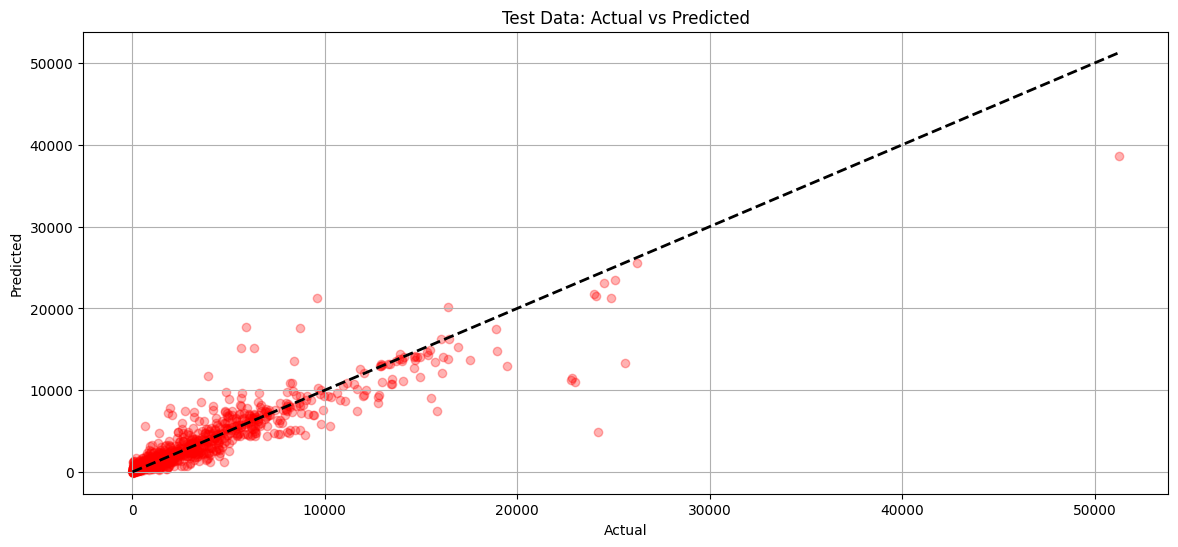

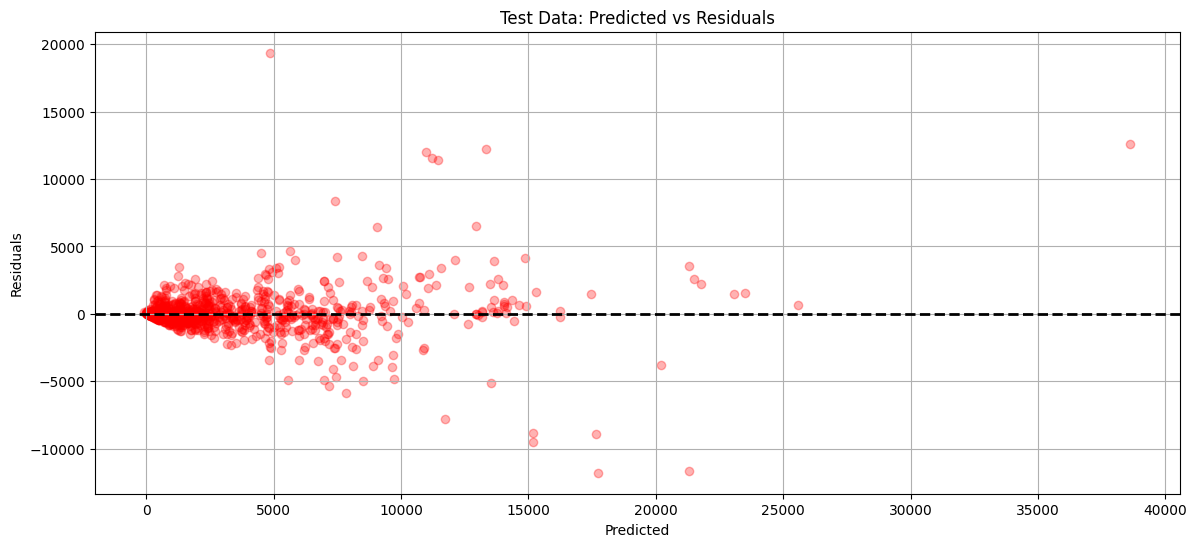

Cross-Validation R-squared Scores: [0.8593597  0.8880811  0.8231777  0.84580568 0.81695022]
Mean Cross-Validation R-squared: 0.8466748788672538
Performance Scores: {'Train MSE': 349450.0887595321, 'Test MSE': 3099648.929384981, 'Test MAE': 866.452022163213, 'Test R-squared': 0.8452889311535834, 'Cross-Validation R-squared Scores': array([0.8593597 , 0.8880811 , 0.8231777 , 0.84580568, 0.81695022]), 'Mean Cross-Validation R-squared': 0.8466748788672538}


In [67]:
### As model 1 is kind of overfiting when predicting the data, so now I try o delte year varaible to test again ##
features_3 = ['Population', 'GDP_per_capita_USD', 'Inflation_annual_percent','IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income']
target_3 = 'Consumption_kWh_per_capita'

X = data[features_3]
y = data[target_3]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV


scaler_3 = StandardScaler()
X_train = scaler_3.fit_transform(X_train)
X_test = scaler_3.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Grid search with K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params_3 = grid_search.best_params_
best_score_3 = -grid_search.best_score_

print(f"Best Parameters: {best_params_3}")
print(f"Best Cross-Validation MSE: {best_score_3}")

# Train the model with the best parameters
best_model_3 = GradientBoostingRegressor(**best_params_3, random_state=42)
best_model_3.fit(X_train, y_train)

# Make predictions
y_pred_train_3 = best_model_3.predict(X_train)
y_pred_test_3 = best_model_3.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train_3)
test_mse = mean_squared_error(y_test, y_pred_test_3)
mae_test = mean_absolute_error(y_test, y_pred_test_3)
r2_test = r2_score(y_test, y_pred_test_3)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {mae_test}")
print(f"Test R-squared: {r2_test}")

# Visualize Predictions vs. Actual Values for Test Data
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_test_3, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.grid(True)
plt.show()

# Visualize Residuals for Test Data
test_residuals = y_test - y_pred_test_3
plt.figure(figsize=(14, 6))
plt.scatter(y_pred_test_3, test_residuals, alpha=0.3, color='red')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Test Data: Predicted vs Residuals')
plt.grid(True)
plt.show()

# Cross-validation results
cv_results = cross_val_score(best_model_3, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_results}")
print(f"Mean Cross-Validation R-squared: {np.mean(cv_results)}")

# Display all performance scores
performance_scores = {
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Test MAE": mae_test,
    "Test R-squared": r2_test,
    "Cross-Validation R-squared Scores": cv_results,
    "Mean Cross-Validation R-squared": np.mean(cv_results)
}

print("Performance Scores:", performance_scores)

In [57]:
features = ['Year','Population', 'GDP_per_capita_USD', 'Inflation_annual_percent','IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income']
target = 'Consumption_kWh_per_capita'

X = data[features]
y = data[target]

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [53]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [54]:
# Perform cross-validation
model = GradientBoostingRegressor(random_state=42)
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
cv_mse = -cv_scores.mean()

print(f"Cross-Validation MSE: {cv_mse}")


Cross-Validation MSE: 4557463.395050983


In [55]:
# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")


KeyboardInterrupt: 

In [ ]:
# Train the model with the best parameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {mae_test}")
print(f"Test R-squared: {r2_test}")

# Visualize Predictions vs. Actual Values for Test Data
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.grid(True)
plt.show()

# Visualize Residuals for Test Data
test_residuals = y_test - y_pred_test
plt.figure(figsize=(14, 6))
plt.scatter(y_pred_test, test_residuals, alpha=0.3, color='red')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Test Data: Predicted vs Residuals')
plt.grid(True)
plt.show()

In [ ]:
##### use K-Fold validation to do all over again ( in model 1)

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV


scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search with K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search.best_params_
best_score = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")

# Train the model with the best parameters
best_model = GradientBoostingRegressor(**best_params, random_state=42)
best_model.fit(X_train, y_train)

# Make predictions
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)
r2_test = r2_score(y_test, y_pred_test)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {mae_test}")
print(f"Test R-squared: {r2_test}")

# Visualize Predictions vs. Actual Values for Test Data
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_test, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.grid(True)
plt.show()

# Visualize Residuals for Test Data
test_residuals = y_test - y_pred_test
plt.figure(figsize=(14, 6))
plt.scatter(y_pred_test, test_residuals, alpha=0.3, color='red')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Test Data: Predicted vs Residuals')
plt.grid(True)
plt.show()

# Cross-validation results
cv_results = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_results}")
print(f"Mean Cross-Validation R-squared: {np.mean(cv_results)}")

# Display all performance scores
performance_scores = {
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Test MAE": mae_test,
    "Test R-squared": r2_test,
    "Cross-Validation R-squared Scores": cv_results,
    "Mean Cross-Validation R-squared": np.mean(cv_results)
}

print("Performance Scores:", performance_scores)

In [ ]:
data_test_4.columns

In [ ]:
data.columns

In [ ]:
data_test_3.columns

In [ ]:
data_test_5 = data_test_3.dropna(subset=['GDP per capita (current US$)_x', 'Inflation (annual %)_x','Access to electricity (% of population)'])

In [ ]:
missing_values = data_test_5.isna().sum()
missing_values


In [ ]:
data_test_5.shape

In [ ]:
data_test_5.columns

In [ ]:
data_test_5 = pd.get_dummies(data_test_5, columns=['IncomeGroup'])

In [ ]:
data_test_5.columns

In [ ]:
data_test_5 = data_test_5.rename(columns={
    'Consumption (kWh per capita)': 'Consumption_kWh_per_capita',
    'GDP per capita (current US$)_x': 'GDP_per_capita_USD',
    'Inflation (annual %)_x': 'Inflation_annual_percent',
    'IncomeGroup_High income': 'IncomeGroup_High_income',
    'IncomeGroup_Low income': 'IncomeGroup_Low_income',
    'IncomeGroup_Lower middle income': 'IncomeGroup_Lower_middle_income',
    'IncomeGroup_Upper middle income': 'IncomeGroup_Upper_middle_income',
    'Year':'Year',
    'Country':'Country',
    'Population': 'Population',
    'Access to electricity (% of population)':'Access_to_electricity'

})

In [ ]:
data_test_5.columns

In [ ]:
data_test_5.shape

In [ ]:
data_test_5

In [ ]:
### Model to predict the access % to electricity with dataset's varaibles except Consumption of electricity
features = ['Year','Population', 'GDP_per_capita_USD', 'Inflation_annual_percent','IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income']
target = 'Access_to_electricity'

X = data_test_5[features]
y = data_test_5[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV

scaler_2 = StandardScaler()
X_train = scaler_2.fit_transform(X_train)
X_test = scaler_2.transform(X_test)

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

# Perform grid search with K-Fold cross-validation
kf_2 = KFold(n_splits=5, shuffle=True, random_state=42)
grid_search_2 = GridSearchCV(estimator=GradientBoostingRegressor(random_state=42), param_grid=param_grid, cv=kf, scoring='neg_mean_squared_error')
grid_search_2.fit(X_train, y_train)

# Get the best parameters and best score
best_params_2 = grid_search.best_params_
best_score_2 = -grid_search.best_score_

print(f"Best Parameters: {best_params}")
print(f"Best Cross-Validation MSE: {best_score}")

# Train the model with the best parameters
best_model_2 = GradientBoostingRegressor(**best_params, random_state=42)
best_model_2.fit(X_train, y_train)

# Make predictions
y_pred_train_2 = best_model_2.predict(X_train)
y_pred_test_2 = best_model_2.predict(X_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train_2)
test_mse = mean_squared_error(y_test, y_pred_test_2)
mae_test = mean_absolute_error(y_test, y_pred_test_2)
r2_test = r2_score(y_test, y_pred_test_2)

print(f"Train MSE: {train_mse}")
print(f"Test MSE: {test_mse}")
print(f"Test MAE: {mae_test}")
print(f"Test R-squared: {r2_test}")

# Visualize Predictions vs. Actual Values for Test Data
plt.figure(figsize=(14, 6))
plt.scatter(y_test, y_pred_test_2, alpha=0.3, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Test Data: Actual vs Predicted')
plt.grid(True)
plt.show()

# Visualize Residuals for Test Data
test_residuals = y_test - y_pred_test_2
plt.figure(figsize=(14, 6))
plt.scatter(y_pred_test_2, test_residuals, alpha=0.3, color='red')
plt.axhline(y=0, color='k', linestyle='--', lw=2)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Test Data: Predicted vs Residuals')
plt.grid(True)
plt.show()

# Cross-validation results
cv_results = cross_val_score(best_model, X_train, y_train, cv=kf, scoring='r2')
print(f"Cross-Validation R-squared Scores: {cv_results}")
print(f"Mean Cross-Validation R-squared: {np.mean(cv_results)}")

# Display all performance scores
performance_scores = {
    "Train MSE": train_mse,
    "Test MSE": test_mse,
    "Test MAE": mae_test,
    "Test R-squared": r2_test,
    "Cross-Validation R-squared Scores": cv_results,
    "Mean Cross-Validation R-squared": np.mean(cv_results)
}

print("Performance Scores:", performance_scores)

In [ ]:
###testing the model with arbitary data
future_data = pd.DataFrame({
    'Year': [2016, 2016, 2017],
    'Population': [35000000, 35500000, 36000000],
    'GDP_per_capita_USD': [20000, 15000, 15000],
    'Inflation_annual_percent': [2.5, 2.5, 20],
    'IncomeGroup_High_income': [0, 0, 1],
    'IncomeGroup_Low_income': [0, 0, 0],
    'IncomeGroup_Lower_middle_income': [0, 1, 0],
    'IncomeGroup_Upper_middle_income': [1, 0, 0]
})

# Ensure the future data has the same features as the training data
features_future = ['Year', 'Population', 'GDP_per_capita_USD', 'Inflation_annual_percent',
                   'IncomeGroup_High_income', 'IncomeGroup_Low_income',
                   'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income']

# Scale the future data using the scaler fitted on the training data
future_data_scaled = scaler_2.transform(future_data[features_future])

# Make predictions using the trained model
future_predictions = best_model_2.predict(future_data_scaled)

# Add predictions to the future data
future_data['Predicted_Access_to_electricity'] = future_predictions

# Display the future data with predictions
print(future_data)

In [ ]:
population_data.columns = [col if col in ['Country Name', 'Country Code', 'Series Name', 'Series Code'] else col.split(' ')[0] for col in population_data.columns]

# Display the renamed columns
print(population_data.columns)

In [ ]:
population_data_long = population_data.melt(id_vars=['Country Name', 'Country Code', 'Series Name', 'Series Code'],
                                            var_name='Year',
                                            value_name='Population')

In [ ]:
population_data_long

In [ ]:
population_data_long = population_data_long.drop(columns=['Country Code', 'Series Name', 'Series Code'])

In [ ]:
population_data_long = population_data_long.rename(columns={'Country Name': 'Country'})

In [ ]:
population_data_long['Year'] = population_data_long['Year'].astype(int)

In [ ]:
print(population_data_long.head())

In [ ]:
inflation_file_path = '/content/sample_data/Inflation rate.csv'
gdp_file_path = '/content/sample_data/GDP per capita.csv'

inflation_data = pd.read_csv(inflation_file_path)
gdp_data = pd.read_csv(gdp_file_path)

In [ ]:
print(inflation_data.head())
print(inflation_data.columns)
print(gdp_data.head())
print(gdp_data.columns)

In [ ]:
# Extract year from the column names for inflation data
inflation_data.columns = [col if col in ['Country Name', 'Country Code', 'Series Name', 'Series Code'] else col.split(' ')[0] for col in inflation_data.columns]

# Extract year from the column names for GDP data
gdp_data.columns = [col if col in ['Country Name', 'Country Code', 'Series Name', 'Series Code'] else col.split(' ')[0] for col in gdp_data.columns]

# Display the renamed columns
print(inflation_data.columns)
print(gdp_data.columns)

In [ ]:
inflation_data

In [ ]:
gdp_data

In [ ]:

inflation_data_long = inflation_data.melt(id_vars=['Country'], var_name='Year', value_name='Value')

gdp_data_long = gdp_data.melt(id_vars=['Country'], var_name='Year', value_name='Value')

In [ ]:
inflation_data_long.replace('no data', pd.NA, inplace=True)

gdp_data_long.replace('no data', pd.NA, inplace=True)

In [ ]:
inflation_data_long

In [ ]:
gdp_data_long

In [ ]:
inflation_data_long

In [ ]:
inflation_data_cleaned = inflation_data_long.dropna(subset=['Value'])

inflation_data_cleaned['Year'] = inflation_data_cleaned['Year'].astype(int)

In [ ]:
inflation_data_long

In [ ]:
gdp_data_long_cleaned = gdp_data_long.dropna(subset=['Value'])

gdp_data_long_cleaned['Year'] = gdp_data_long_cleaned['Year'].astype(int)


print(gdp_data_long_cleaned.head())
print(inflation_data_cleaned.head())


In [ ]:
gdp_data_long_cleaned

In [ ]:
inflation_data_cleaned

In [ ]:
inflation_data_cleaned.shape

In [ ]:
gdp_data_long_cleaned.shape

In [ ]:
gdp_data_long_cleaned = gdp_data_long_cleaned.rename(columns={'Value': 'GDP'})

In [ ]:
inflation_data_cleaned = inflation_data_cleaned.rename(columns={'Value': 'Inflation rate'})


In [ ]:
population_data_long_file_path = '/content/sample_data/population_data_long_IMF.csv'
population_data_long = pd.read_csv(population_data_long_file_path)

In [ ]:
population_data_long.shape

In [ ]:
missingvalues = population_data_long.isna().sum()
missingvalues

In [ ]:

inflation_data_cleaned

inflation_data_cleaned_path = 'inflation_data_cleaned.csv'
inflation_data_cleaned.to_csv(inflation_data_cleaned_path, index=False)

In [ ]:
population_data_long = population_data_long.dropna(subset=['Population'])

In [ ]:
population_data_long
population_data_long_path = 'population_data_long.csv'
population_data_long.to_csv(population_data_long_path, index=False)

In [ ]:
inflation_data_cleaned

In [ ]:
gdp_data_long_cleaned

gdp_data_long_cleaned_path = 'gdp_data_long_cleaned.csv'
gdp_data_long_cleaned.to_csv(gdp_data_long_cleaned_path, index=False)

In [ ]:
merged_data_1 = pd.merge(inflation_data_cleaned, gdp_data_long_cleaned, on=['Country', 'Year'], how='inner')


In [ ]:
gdp_data_long_cleaned.shape

In [ ]:
inflation_data_cleaned.shape

In [ ]:
merged_data_1.shape

In [ ]:
merged_data_1

In [ ]:
population_data_long

In [ ]:
missingvalues = merged_data_1.isna().sum()
missingvalues

In [ ]:
merged_data_2 = pd.merge(merged_data_1, population_data_long, on=['Country', 'Year'], how='inner')


In [ ]:
merged_data_2

In [ ]:
data_test_5.columns

In [ ]:
merged_data_2.shape

In [ ]:
income_group_columns = ['Country',  'IncomeGroup_High_income',
       'IncomeGroup_Low_income', 'IncomeGroup_Lower_middle_income',
       'IncomeGroup_Upper_middle_income']
income_group_data = data_test_5[income_group_columns]

income_group_data

In [ ]:
income_group_data = income_group_data.drop_duplicates(subset=['Country'])

In [ ]:
merged_data_3 = pd.merge(merged_data_2, income_group_data, on='Country', how='left')

In [ ]:
merged_data_2.shape

In [ ]:
merged_data_3.shape

In [ ]:
merged_data_3

In [ ]:
input_data = merged_data_3.dropna(subset=['IncomeGroup_High_income'])

In [ ]:
input_data.shape

In [ ]:
input_data_2 = input_data[(input_data['Year'] >= 2015) & (input_data['Year'] <= 2029)]
print(input_data_2.head())

In [ ]:
input_data_2.shape

In [ ]:
input_data_2

In [ ]:
input_data_2['IncomeGroup_High_income'] = input_data_2['IncomeGroup_High_income'].astype(int)
input_data_2['IncomeGroup_Low_income'] = input_data_2['IncomeGroup_Low_income'].astype(int)
input_data_2['IncomeGroup_Lower_middle_income'] = input_data_2['IncomeGroup_Lower_middle_income'].astype(int)
input_data_2['IncomeGroup_Upper_middle_income'] = input_data_2['IncomeGroup_Upper_middle_income'].astype(int)

In [ ]:
input_data_2

In [ ]:
data_test_5.columns

In [ ]:
input_data_2.columns

In [ ]:
input_data_2.shape

In [ ]:
input_data_2 = input_data_2.rename(columns={
    'GDP per capita (current US$)': 'GDP_per_capita_USD',
    'Inflation (annual %)': 'Inflation_annual_percent',
    'IncomeGroup_High_income': 'IncomeGroup_High_income',
    'IncomeGroup_Low_income': 'IncomeGroup_Low_income',
    'IncomeGroup_Lower_middle_income': 'IncomeGroup_Lower_middle_income',
    'IncomeGroup_Upper_middle_income':'IncomeGroup_Upper_middle_income',
    'Year':'Year',
    'Country':'Country',
    'Population': 'Population'

})

In [70]:
input_data_2.shape

(1783, 10)

In [71]:
input_data_2

,Country,Year,Inflation_annual_percent,GDP_per_capita_USD,Population,IncomeGroup_High_income,IncomeGroup_Low_income,IncomeGroup_Lower_middle_income,IncomeGroup_Upper_middle_income,Predicted_Access_to_electricity
0,Albania,2015,1.9,3953.611,2880703,0,0,0,1,99.592985
1,Algeria,2015,4.8,4691.686,39543154,0,0,1,0,96.152911
2,Angola,2015,9.2,4130.930,28127721,0,0,1,0,59.216709
3,Armenia,2015,3.7,3529.026,2878595,0,0,0,1,95.670270
4,Australia,2015,1.5,51471.651,23815995,1,0,0,0,99.970803
...,...,...,...,...,...,...,...,...,...,...
1778,United States,2029,2.1,100579.865,344768288,1,0,0,0,100.178353
1779,Uruguay,2029,4.6,28431.828,3423584,1,0,0,0,99.909538
1780,Uzbekistan,2029,5.0,4198.041,39006944,0,0,1,0,95.163188
1781,Zambia,2029,7.0,1853.015,24069686,0,0,1,0,63.646170


In [ ]:

# Ensure the future data has the same features as the training data
features_future = ['Year', 'Population', 'GDP_per_capita_USD', 'Inflation_annual_percent',
                   'IncomeGroup_High_income', 'IncomeGroup_Low_income',
                   'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income']

# Scale the future data using the scaler fitted on the training data
future_data_scaled = scaler_2.transform(input_data_2[features_future])

# Make predictions using the trained model
future_predictions = best_model_2.predict(future_data_scaled)

# Add predictions to the future data
input_data_2['Predicted_Access_to_electricity'] = future_predictions

# Display the future data with predictions
print(input_data_2)

In [ ]:
input_data_2

In [ ]:
input_data_2_path = 'predicted_acess_electricity_2015_2029.csv'
input_data_2.to_csv(input_data_2_path, index=False)

In [63]:
# Define the path to the CSV file on Google Drive
csv_file_path = '/content/sample_data/predicted_access_electricity_2015_2029.csv'

# Read the CSV file into a Pandas DataFrame
input_data_2 = pd.read_csv(csv_file_path)


In [64]:
input_data_2

,Country,Year,Inflation_annual_percent,GDP_per_capita_USD,Population,IncomeGroup_High_income,IncomeGroup_Low_income,IncomeGroup_Lower_middle_income,IncomeGroup_Upper_middle_income,Predicted_Access_to_electricity
0,Albania,2015,1.9,3953.611,2880703,0,0,0,1,99.592985
1,Algeria,2015,4.8,4691.686,39543154,0,0,1,0,96.152911
2,Angola,2015,9.2,4130.930,28127721,0,0,1,0,59.216709
3,Armenia,2015,3.7,3529.026,2878595,0,0,0,1,95.670270
4,Australia,2015,1.5,51471.651,23815995,1,0,0,0,99.970803
...,...,...,...,...,...,...,...,...,...,...
1778,United States,2029,2.1,100579.865,344768288,1,0,0,0,100.178353
1779,Uruguay,2029,4.6,28431.828,3423584,1,0,0,0,99.909538
1780,Uzbekistan,2029,5.0,4198.041,39006944,0,0,1,0,95.163188
1781,Zambia,2029,7.0,1853.015,24069686,0,0,1,0,63.646170


In [65]:
### Drop column Predicted_Access_to_electricity and input to the first model trained without access %
input_data_3 = input_data_2.drop(columns=['Predicted_Access_to_electricity'])

In [66]:
input_data_4 = input_data_3

In [68]:
# Use first model trained without access % to predict the electricity from 2015 to 2029
# Ensure the future data has the same features as the training data
features_future = ['Population', 'GDP_per_capita_USD', 'Inflation_annual_percent',
                   'IncomeGroup_High_income', 'IncomeGroup_Low_income',
                   'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income']

# Scale the future data using the scaler fitted on the training data
future_data_scaled = scaler_3.transform(input_data_4[features_future])

# Make predictions using the trained model
future_predictions = best_model_3.predict(future_data_scaled)

# Add predictions to the future data
input_data_4['Predicted_electricity_Consumption'] = future_predictions

# Display the future data with predictions
print(input_data_4)

            Country  Year  Inflation_annual_percent  GDP_per_capita_USD  \
0           Albania  2015                       1.9            3953.611   
1           Algeria  2015                       4.8            4691.686   
2            Angola  2015                       9.2            4130.930   
3           Armenia  2015                       3.7            3529.026   
4         Australia  2015                       1.5           51471.651   
...             ...   ...                       ...                 ...   
1778  United States  2029                       2.1          100579.865   
1779        Uruguay  2029                       4.6           28431.828   
1780     Uzbekistan  2029                       5.0            4198.041   
1781         Zambia  2029                       7.0            1853.015   
1782       Zimbabwe  2029                     400.0            2210.142   

      Population  IncomeGroup_High_income  IncomeGroup_Low_income  \
0        2880703              

In [69]:
input_data_4_path = 'predicted_electricity_consumption_2015_2029_2.csv'
input_data_4.to_csv(input_data_4_path, index=False)

In [72]:
input_data_4

,Country,Year,Inflation_annual_percent,GDP_per_capita_USD,Population,IncomeGroup_High_income,IncomeGroup_Low_income,IncomeGroup_Lower_middle_income,IncomeGroup_Upper_middle_income,Predicted_electricity_Consumption
0,Albania,2015,1.9,3953.611,2880703,0,0,0,1,2002.796191
1,Algeria,2015,4.8,4691.686,39543154,0,0,1,0,1066.626560
2,Angola,2015,9.2,4130.930,28127721,0,0,1,0,1086.534317
3,Armenia,2015,3.7,3529.026,2878595,0,0,0,1,1802.870936
4,Australia,2015,1.5,51471.651,23815995,1,0,0,0,10753.955036
...,...,...,...,...,...,...,...,...,...,...
1778,United States,2029,2.1,100579.865,344768288,1,0,0,0,13119.816272
1779,Uruguay,2029,4.6,28431.828,3423584,1,0,0,0,10111.486906
1780,Uzbekistan,2029,5.0,4198.041,39006944,0,0,1,0,1146.018906
1781,Zambia,2029,7.0,1853.015,24069686,0,0,1,0,482.113106


In [73]:
input_data_4.shape

(1783, 10)

In [74]:
input_data_2.shape

(1783, 10)

In [75]:
input_data_2.columns

Index(['Country', 'Year', 'Inflation_annual_percent', 'GDP_per_capita_USD',
       'Population', 'IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income',
       'Predicted_Access_to_electricity'],
      dtype='object')

In [79]:
input_data_4.columns

Index(['Country', 'Year', 'Inflation_annual_percent', 'GDP_per_capita_USD',
       'Population', 'IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income',
       'Predicted_electricity_Consumption'],
      dtype='object')

In [81]:
input_data_4

,Country,Year,Inflation_annual_percent,GDP_per_capita_USD,Population,IncomeGroup_High_income,IncomeGroup_Low_income,IncomeGroup_Lower_middle_income,IncomeGroup_Upper_middle_income,Predicted_electricity_Consumption
0,Albania,2015,1.9,3953.611,2880703,0,0,0,1,2002.796191
1,Algeria,2015,4.8,4691.686,39543154,0,0,1,0,1066.626560
2,Angola,2015,9.2,4130.930,28127721,0,0,1,0,1086.534317
3,Armenia,2015,3.7,3529.026,2878595,0,0,0,1,1802.870936
4,Australia,2015,1.5,51471.651,23815995,1,0,0,0,10753.955036
...,...,...,...,...,...,...,...,...,...,...
1778,United States,2029,2.1,100579.865,344768288,1,0,0,0,13119.816272
1779,Uruguay,2029,4.6,28431.828,3423584,1,0,0,0,10111.486906
1780,Uzbekistan,2029,5.0,4198.041,39006944,0,0,1,0,1146.018906
1781,Zambia,2029,7.0,1853.015,24069686,0,0,1,0,482.113106


In [80]:
input_data_2

,Country,Year,Inflation_annual_percent,GDP_per_capita_USD,Population,IncomeGroup_High_income,IncomeGroup_Low_income,IncomeGroup_Lower_middle_income,IncomeGroup_Upper_middle_income,Predicted_Access_to_electricity
0,Albania,2015,1.9,3953.611,2880703,0,0,0,1,99.592985
1,Algeria,2015,4.8,4691.686,39543154,0,0,1,0,96.152911
2,Angola,2015,9.2,4130.930,28127721,0,0,1,0,59.216709
3,Armenia,2015,3.7,3529.026,2878595,0,0,0,1,95.670270
4,Australia,2015,1.5,51471.651,23815995,1,0,0,0,99.970803
...,...,...,...,...,...,...,...,...,...,...
1778,United States,2029,2.1,100579.865,344768288,1,0,0,0,100.178353
1779,Uruguay,2029,4.6,28431.828,3423584,1,0,0,0,99.909538
1780,Uzbekistan,2029,5.0,4198.041,39006944,0,0,1,0,95.163188
1781,Zambia,2029,7.0,1853.015,24069686,0,0,1,0,63.646170


In [84]:
print("Columns in input_data_4:", input_data_4.columns)
print("Columns in input_data_2:", input_data_2.columns)

print("Data types in input_data_4:")
print(input_data_4.dtypes)

print("Data types in input_data_2:")
print(input_data_2.dtypes)



Columns in input_data_4: Index(['Country', 'Year', 'Inflation_annual_percent', 'GDP_per_capita_USD',
       'Population', 'IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income',
       'Predicted_electricity_Consumption'],
      dtype='object')
Columns in input_data_2: Index(['Country', 'Year', 'Inflation_annual_percent', 'GDP_per_capita_USD',
       'Population', 'IncomeGroup_High_income', 'IncomeGroup_Low_income',
       'IncomeGroup_Lower_middle_income', 'IncomeGroup_Upper_middle_income',
       'Predicted_Access_to_electricity'],
      dtype='object')
Data types in input_data_4:
Country                               object
Year                                   int64
Inflation_annual_percent             float64
GDP_per_capita_USD                   float64
Population                             int64
IncomeGroup_High_income                int64
IncomeGroup_Low_income                 int64
IncomeGroup_Lower_mid

In [85]:
# Check unique values in the Country column to ensure consistency
print("Unique values in input_data_4['Country']:", input_data_4['Country'].unique())
print("Unique values in input_data_2['Country']:", input_data_2['Country'].unique())


Unique values in input_data_4['Country']: ['Albania' 'Algeria' 'Angola' 'Armenia' 'Australia' 'Austria' 'Azerbaijan'
 'Bahrain' 'Bangladesh' 'Belarus' 'Belgium' 'Benin' 'Bolivia'
 'Bosnia and Herzegovina' 'Botswana' 'Brazil' 'Brunei Darussalam'
 'Bulgaria' 'Cambodia' 'Cameroon' 'Canada' 'Chile' 'Colombia' 'Costa Rica'
 'Croatia' 'Cyprus' 'Denmark' 'Dominican Republic' 'Ecuador' 'El Salvador'
 'Eritrea' 'Estonia' 'Ethiopia' 'Finland' 'France' 'Gabon' 'Georgia'
 'Germany' 'Ghana' 'Greece' 'Guatemala' 'Haiti' 'Honduras' 'Hungary'
 'Iceland' 'India' 'Indonesia' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
 'Japan' 'Jordan' 'Kazakhstan' 'Kenya' 'Kuwait' 'Kyrgyz Republic' 'Latvia'
 'Lebanon' 'Libya' 'Lithuania' 'Luxembourg' 'Malaysia' 'Malta' 'Mauritius'
 'Mexico' 'Moldova' 'Mongolia' 'Montenegro' 'Morocco' 'Mozambique'
 'Myanmar' 'Namibia' 'Nepal' 'Netherlands' 'New Zealand' 'Nicaragua'
 'Niger' 'Nigeria' 'Norway' 'Oman' 'Pakistan' 'Panama' 'Paraguay' 'Peru'
 'Philippines' 'Poland' 'Portugal

In [86]:
# Check for null values in the merging columns
print("Null values in input_data_4['Country']:", input_data_4['Country'].isnull().sum())
print("Null values in input_data_4['Year']:", input_data_4['Year'].isnull().sum())
print("Null values in input_data_2['Country']:", input_data_2['Country'].isnull().sum())
print("Null values in input_data_2['Year']:", input_data_2['Year'].isnull().sum())


Null values in input_data_4['Country']: 0
Null values in input_data_4['Year']: 0
Null values in input_data_2['Country']: 0
Null values in input_data_2['Year']: 0


In [87]:
predicted_data_access_consumption = pd.merge(
    input_data_4,
    input_data_2[['Country', 'Year', 'Predicted_Access_to_electricity']],
    on=['Country', 'Year'],
    how='left'
)

In [88]:
predicted_data_access_consumption

,Country,Year,Inflation_annual_percent,GDP_per_capita_USD,Population,IncomeGroup_High_income,IncomeGroup_Low_income,IncomeGroup_Lower_middle_income,IncomeGroup_Upper_middle_income,Predicted_electricity_Consumption,Predicted_Access_to_electricity
0,Albania,2015,1.9,3953.611,2880703,0,0,0,1,2002.796191,99.592985
1,Algeria,2015,4.8,4691.686,39543154,0,0,1,0,1066.626560,96.152911
2,Angola,2015,9.2,4130.930,28127721,0,0,1,0,1086.534317,59.216709
3,Armenia,2015,3.7,3529.026,2878595,0,0,0,1,1802.870936,95.670270
4,Australia,2015,1.5,51471.651,23815995,1,0,0,0,10753.955036,99.970803
...,...,...,...,...,...,...,...,...,...,...,...
1778,United States,2029,2.1,100579.865,344768288,1,0,0,0,13119.816272,100.178353
1779,Uruguay,2029,4.6,28431.828,3423584,1,0,0,0,10111.486906,99.909538
1780,Uzbekistan,2029,5.0,4198.041,39006944,0,0,1,0,1146.018906,95.163188
1781,Zambia,2029,7.0,1853.015,24069686,0,0,1,0,482.113106,63.646170


In [89]:
predicted_data_access_consumption_path = 'predicted_data_access_consumption_2015_2029.csv'
predicted_data_access_consumption.to_csv(predicted_data_access_consumption_path, index=False)

In [ ]:
data

In [ ]:
data.columns

In [ ]:

income_group_data = income_group_data.drop_duplicates(subset=['Country'])

print(income_group_data.head())

In [ ]:
income_group_data.shape

In [ ]:
merged_data = pd.merge(prediction_data, income_group_data, on='Country', how='left')

In [ ]:
merged_data

In [ ]:
input_data = merged_data.dropna(subset=['IncomeGroup_High_income'])

In [ ]:
input_data

In [ ]:
input_data.columns

In [ ]:
input_data = input_data.rename(columns={
    'Access_to_electricity_percent':'Access to electricity (% of population)',
    'GDP_per_capita_USD':'GDP per capita (current US$)',
    'Inflation_annual_percent': 'Inflation (annual %)',
    'IncomeGroup_High_income': 'IncomeGroup_High income',
    'IncomeGroup_Low_income':'IncomeGroup_Low income',
    'IncomeGroup_Lower_middle_income':'IncomeGroup_Lower middle income',
    'IncomeGroup_Upper_middle_income':'IncomeGroup_Upper middle income',
    'Country':'Country',
    'Year':'Year'
})

In [ ]:
features = ['Year','Population', 'GDP per capita (current US$)', 'Inflation (annual %)','IncomeGroup_High income',
       'IncomeGroup_Low income', 'IncomeGroup_Lower middle income',
       'IncomeGroup_Upper middle income']

In [ ]:
X_new = input_data[features]

In [ ]:
X_new

In [ ]:
X_new_scaled = scaler.transform(X_new)

In [ ]:
# Extract the features
X_pred = input_data[features]

# Scale the features using the previously fitted scaler
X_pred_scaled = scaler.transform(X_pred)


In [ ]:

# Make predictions using the trained model
predictions = best_model.predict(X_pred_scaled)

# Add the predictions to the prediction_data DataFrame
input_data['Predicted_Electricity_Consumption'] = predictions

# Save the predictions to a new CSV file
prediction_output_path = 'predicted_electricity_consumption_2015_2020.csv'
input_data.to_csv(prediction_output_path, index=False)

# Display the predictions
print(input_data[['Country', 'Year', 'Predicted_Electricity_Consumption']])

In [ ]:
data

In [ ]:
data_2024 = data[data['Year'] == 2014][['Country', 'Access_to_electricity_percent']]


In [ ]:
data_2024 = data_2024.rename(columns={'Access_to_electricity_percent': 'Access_to_electricity_2014'})

In [ ]:
merged_prediction_data = pd.merge(input_data, data_2024, on='Country', how='left')


In [ ]:
merged_prediction_data

In [ ]:
low_access_countries = merged_prediction_data[merged_prediction_data['Access_to_electricity_2014'] < 80]

In [ ]:
low_access_countries

In [ ]:
prediction_output_path_2 = 'predicted_electricity_consumption_2_2015_2020.csv'
low_access_countries.to_csv(prediction_output_path_2, index=False)